<p style="text-align: center; font-size: 29px;">
  <strong>Yulu - Hypothesis Testing</strong><br>
  <strong>26 November 2024</strong>
</p>

### **Problem Statement**

To help Yulu increase their revenues for their bike sharing platform, Specifically determine:
 - Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
 - How well those variables describe the electric cycle demands

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

### **Identification of variables and data types:**

In [6]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"
df = pd.read_csv(url)

In [7]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Check for Null Values

In [11]:
df.isnull().sum()/len(df)*100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

## Analysing the effect of Work Day on bike renting

#### Graphical Analysis

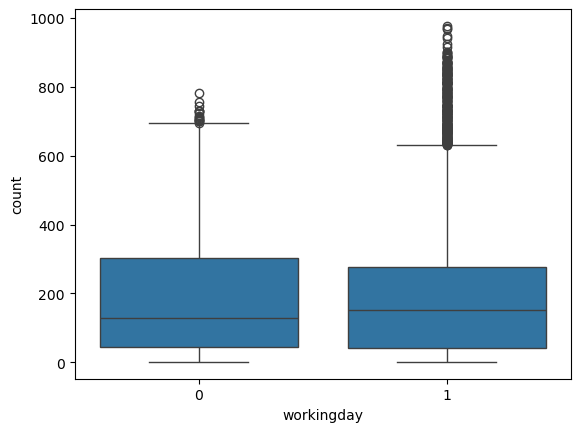

In [14]:
sns.boxplot(data=df,x='workingday',y='count')
plt.show()

### Outlier Treatment - Work Day

In [16]:
q1 = df['count'].quantile(0.25)

In [17]:
q3 = df['count'].quantile(0.75)

In [18]:
iqr = q3 - q1

In [19]:
df = df[(df['count'] > (q1 - 1.5*iqr)) & (df['count'] < (q3 + 1.5*iqr))]

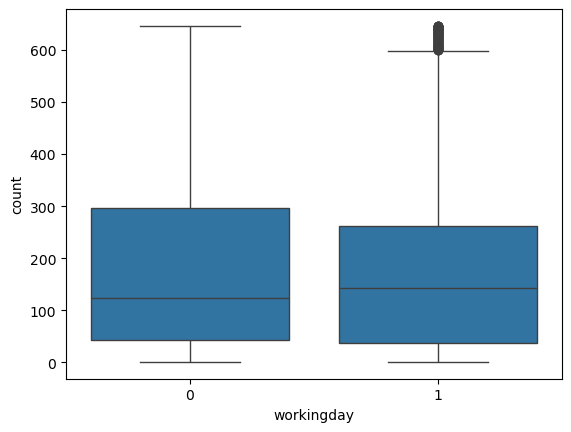

In [20]:
sns.boxplot(data=df,x='workingday',y='count')
plt.show()

Visually there is no significant impact of working day on the count of bikes hired. We test the same using hypothesis testing.

## Hypothesis Testing - Work Day

### Step 1 : Define Null and Alternate Hypothesis

H0(Null Hypothesis) : Count on weekday = Count on Weekend

HA(Alternative Hypothesis) : Count on weekday > Count on Weekend.

### Step 2 : Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. As
the population standard deviations are unknown, the two sample independent t-test will be the
appropriate test for this problem.

### Step 3 : Decide the significance level

If nothing specific mentioned, we pick significance level = 0.05

### Step 4 : Prepare the data

In [28]:
df['workingday'].value_counts()

workingday
1    7161
0    3422
Name: count, dtype: int64

In [29]:
weekday=df[df['workingday']==1]['count'].sample(3422)
weekend=df[df['workingday']==0]['count'].sample(3422)

In [30]:
weekday.std()

152.29252624857477

In [31]:
weekend.std()

163.78216646076027

As the sample standard deviations are different, the population standard deviations may be
assumed to be different.

#### Perform t-test to get the probability that bike rented on weekday is same as that of weekend

In [34]:
from scipy.stats import ttest_ind
t_test, p_value= ttest_ind(weekday, weekend, equal_var=False, alternative='greater')

In [35]:
p_value

0.9933730664577707

- As the p-value 0.954672 is greater than level of significance, we fail to reject the null hypothesis, that -  bike rented count on weekday =  rented count on Weekend.
- Hence we assume that bike rented count on weekday is same as rented count on Weekend

## Is the demand for cycles same for all weather conditions

1. Clear, Few clouds, partly cloudy, partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### Non Graphical analysis

In [40]:
df['weather'].value_counts()

weather
1    6962
2    2770
3     850
4       1
Name: count, dtype: int64

#### Outlier treatment - Remove Weather type 4, as there is only one value in it

In [42]:
df = df[~(df['weather']==4)]

In [43]:
df['weather'].value_counts()

weather
1    6962
2    2770
3     850
Name: count, dtype: int64

In [44]:
w1=df[df['weather']==1]['count'].sample(850)
w2=df[df['weather']==2]['count'].sample(850)
w3=df[df['weather']==3]['count'].sample(850)

In [45]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


### Step 1 : Define Null and Alternate Hypothesis

- H0: Bikes rented is same in all weathers
- Ha: Bikes rented count is not same for all weathers
- alpha = 0.05

### Step 2 : Select Appropriate Test

This is a problem, concerning three population means. **One-way ANOVA** could be the appropriate
test here provided normality and equality of variance assumptions are verified.
- For testing of normality, `Shapiro-Wilk’s test` is applied to the response variable.
- For equality of variance, `Levene test` is applied to the response variable.

#### Shapiro-Wilk's Test : Test for Normal distribution of inputs: 

- H0 : Count follows Normal distribution
- HA : Count does not follow Normal Distribution

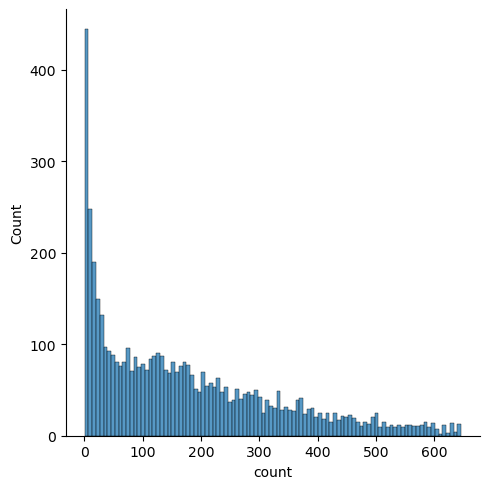

In [49]:
sns.displot(df['count'].sample(4999), bins=100)
plt.show()

The input does not look normal. So, use a transformation : `log normal transformation` to check if input follows Normal distribution.

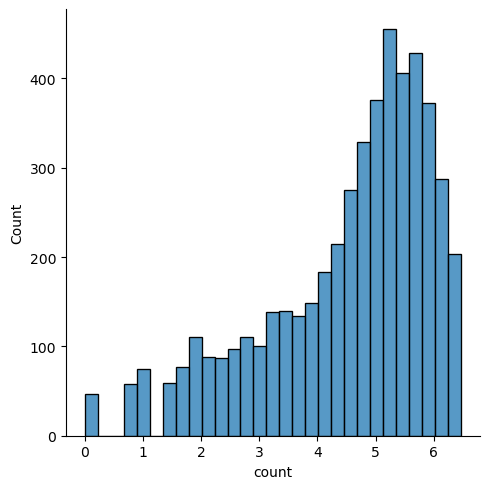

In [51]:
sns.displot(np.log(df['count'].sample(4999)))
plt.show()

The input is still left skewed and does not follow Normal distribution. However, verify using Shapiro Wilk test

In [53]:
from scipy.stats import shapiro
#null - series is normal
#alter- not normal
w, p_value=shapiro(df['count'].sample(4999))

In [54]:
p_value

0.0

As p-value is less than significance value, so we can reject the null hypothesis that count data is a normal distributed data.

Now, use levene test for test of variance

In [57]:
#levene test
#null- equal variance
#alter- not equal var
from scipy.stats import levene
statistic, p_val= levene(w1,w2,w3)

In [58]:
p_val

5.946408810714621e-19

p-value is very low and less than significance level, hence we conclude that the variances are not same.

Both the input assumptions fail for ANOVA.
Yet we go ahead with our analysis using ANOVA.

In [61]:
from scipy.stats import f_oneway
test,p_val=f_oneway(w1,w2,w3)

In [62]:
p_val

6.604983097590893e-27

Since the p_val is very low, we reject the null hypothesis that weather has no effect on bike sharing

In [64]:
# Graphical analysis - Weather v/s count

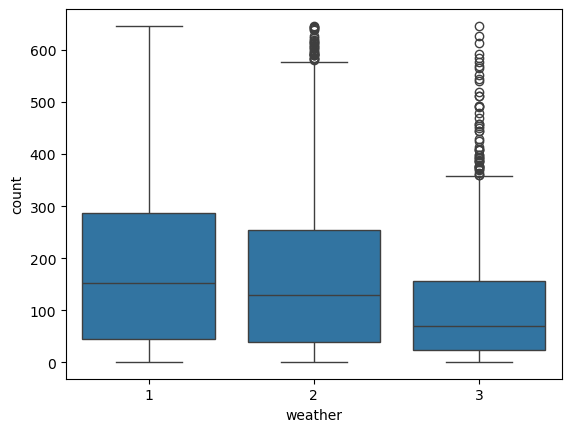

In [65]:
sns.boxplot(data=df,x='weather',y='count')
plt.show()

Bikes are least rented in weather 3

## Effect of season on bike renting

In [68]:
df['season'].value_counts()

season
1    2669
4    2664
2    2633
3    2616
Name: count, dtype: int64

# Hypothesis testing - Season

We select ANOVA because we have more than two inputs to compare
- H0: Bikes rented is same in all seasons
- Ha: Bikes rented count is not same for all seasons

1: spring, 2: summer, 3: fall, 4: winter

From previous analysis, the Normality test already failed for input data.
Now, test for variance using Lavene's test

In [72]:
s1 = df[df['season'] == 1]['count'].sample(min(2685, len(df[df['season'] == 1])))
s2 = df[df['season'] == 2]['count'].sample(min(2685, len(df[df['season'] == 2])))
s3 = df[df['season'] == 3]['count'].sample(min(2685, len(df[df['season'] == 3])))
s4 = df[df['season'] == 4]['count'].sample(min(2685, len(df[df['season'] == 4])))

In [73]:
#levene test
#null- equal variance
#alter- not equal var

test, p_val= levene(s1,s2,s3,s4)

In [74]:
p_val

2.8888914121532733e-112

p-value is very low, hence we conclude that the variances are not same

Both the input assumptions fail for ANOVA.
Yet we go ahead with our analysis using ANOVA

In [77]:
from scipy.stats import f_oneway
test,p_val=f_oneway(s1,s2,s3,s4)

In [78]:
p_val

8.676980501913448e-137

Since the p_val is very low, we reject the null hypothesis that season has no effect on bike sharing

In [80]:
# Graphical analysis - season v/s count

<Axes: xlabel='season', ylabel='count'>

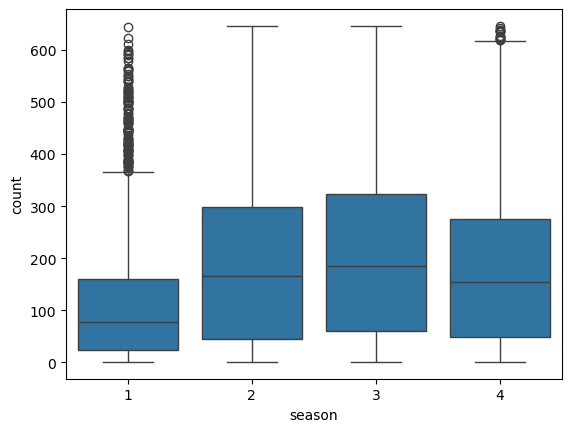

In [81]:
sns.boxplot(data=df,x='season',y='count')

We see that sales are high in season 2 and 3, next best seson is 4, 1 is the season for least rented bikes

# Check if weather is dependent on season 

# Hypothesis testing -  Independence test - Chi-square

We select Chi-sqaure test for independence because

- H0: No association between weather and season
- Ha: Weather is dependent on season, for bike count

In [86]:
subs_table = pd.crosstab(index=df['season'],columns=df['weather'],values=df['count'], aggfunc='sum')
subs_table

weather,1,2,3
season,,,
1,212386,75694,12919
2,366757,121426,26973
3,401955,120789,27883
4,321709,142237,27308


In [87]:
_, p_val, _, _ = sp.stats.chi2_contingency(subs_table)

In [88]:
p_val

0.0

The probability obtained for test of independence is 0. We reject the null hypothesis. Weather and season are dependent

# Business Insights based on  Visual Analysis and Hypothesis Testing

- Workday has no effect on Bike Sharing
- Weather has an effect on bike sharing and bikes are least rented in weather 3
- Season has an effect on bike sharing and bikes are least rented in season 1 
- Weather and season are dependent - weather 1 and season 2, weather 1 and season 3 - indicate high bike rented count

# Recommendation to Yulu

- Give equal priority to weekend and weekdays for renting bike
- Descale operations in weather 3
- Descale operations in season 1.
- Upscale operations in teh following combinations: Weather 1 and season2; Weather 1 and season 3.
Happy renting!